<a href="https://colab.research.google.com/github/radhikabandi/ModelViewControllerTechBlog/blob/main/Fullcode_ML_Airbnb_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Business Context

Airbnb is an online platform that allows people to rent short-term accommodation. This ranges from regular people with a spare bedroom to property management firms who lease multiple rentals. On the one side, Airbnb enables owners to list their space and earn rental money. On the other side, it provides travelers easy access to renting private homes.

Airbnb receives commissions from two sources upon every booking, namely from the hosts and guests. For every booking, Airbnb charges the guest 6-12% of the booking fee. Moreover, Airbnb charges the host 3% for every successful transaction.

As a senior data scientist at Airbnb, you have to come up with a pricing model that can effectively predict the Rent for accommodation and can help hosts, travelers, and also the business in devising profitable strategies.

### Objective

To explore and visualize the data, build a linear regression model to predict the prices of Airbnb rental rooms, and generate a set of insights and recommendations that will help the business.

### Data Description

The data contains information about the different types of rental rooms offered by Airbnb over a fixed period of time. The detailed data dictionary is given below.

**Data Dictionary**

- id: Property ID
- room_type: Type of Room in the property
- accommodates: How many adults can this property accommodate
- bathrooms: Number of bathrooms on the property
- cancellation_policy: Cancellation policy of the property
- cleaning_fee: This denotes whether the property cleaning fee is included in the rent or not
- instant_bookable: It indicates whether an instant booking facility is available or not
- review_scores_rating: Review rating score of the property
- bedrooms: Number of bedrooms in the property
- beds: Total number of beds in the property
- log_price: Log of the rental price of the property for a fixed period. [If the price is 12000 dollars, then log_price represents log(12000)]

## Importing necessary libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 84.5 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
xgboost 2.1.1 requires nvidia-nccl-cu12; platform_system == "Linux" and platform_machine != "aarch64", which is not installed.
cudf-cu12 24.4.1 requires pandas<2.2.2dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.1.4, but you have pandas 1.5.3 which is incompatible.
pandas-stubs 2.1.4.231227 requires numpy>=1.26.0; python_version < "3.13", but you have numpy 1.25.2 which is incompatible.
xarray 2024.6.0 requires pandas>

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Loading the dataset

In [4]:
import pandas as pd
# Loading the dataset
data = pd.read_csv("/content/sample_data/AirBNB-1 (1).csv")


## Data Overview

- Observations
- Sanity checks

In [5]:

# Checking the number of rows and columns in the data
print("Number of rows: ", data.shape[0])
print("Number of columns: ", data.shape[1])

# Checking the first 5 rows of the dataset
data.head()

# Checking the data types of each column
data.info()

# Checking for missing values in the data
data.isnull().sum()

# Checking the descriptive statistics of the numerical columns
data.describe()


Number of rows:  74111
Number of columns:  11
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    74111 non-null  int64  
 1   room_type             74106 non-null  object 
 2   accommodates          74108 non-null  float64
 3   bathrooms             73908 non-null  float64
 4   cancellation_policy   74103 non-null  object 
 5   cleaning_fee          74107 non-null  object 
 6   instant_bookable      74111 non-null  object 
 7   review_scores_rating  57389 non-null  float64
 8   bedrooms              74019 non-null  float64
 9   beds                  73980 non-null  float64
 10  log_price             74111 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 6.2+ MB


,id,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price
count,7.411100e+04,74108.000000,73908.000000,57389.000000,74019.000000,73980.000000,74111.000000
mean,1.126662e+07,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069
std,6.081735e+06,2.153603,0.582054,7.836556,0.852149,1.254142,0.717394
min,3.440000e+02,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000
25%,6.261964e+06,2.000000,1.000000,92.000000,1.000000,1.000000,4.317488
50%,1.225415e+07,2.000000,1.000000,96.000000,1.000000,1.000000,4.709530
75%,1.640226e+07,4.000000,1.000000,100.000000,1.000000,2.000000,5.220356
max,2.123090e+07,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. How are the prices (log_price) of properties distributed?
2. What is the market share of different cancellation policies?
3. How does the price (log_price) of a property vary by the number of bedrooms?
4. How does the price (log_price) of a property vary by the number of accommodates?
5. What are the attributes that have a strong correlation with the price (log_price) of the property?



In [14]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

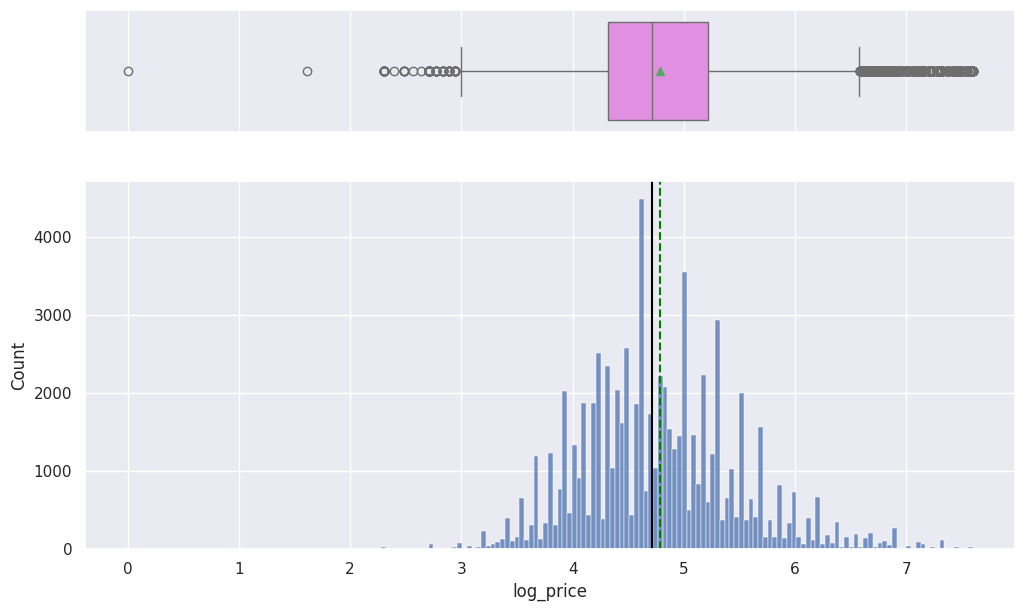

In [17]:
histogram_boxplot(data, "log_price")


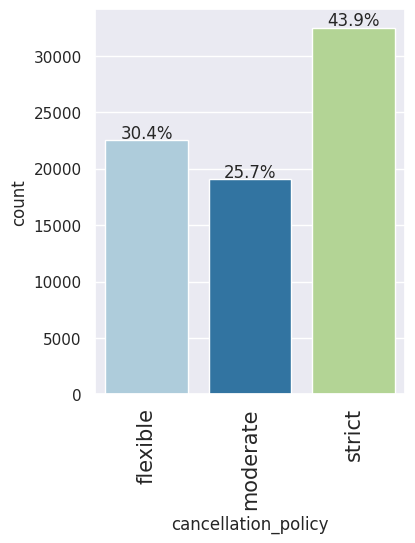

In [18]:
labeled_barplot(data, "cancellation_policy", perc=True)


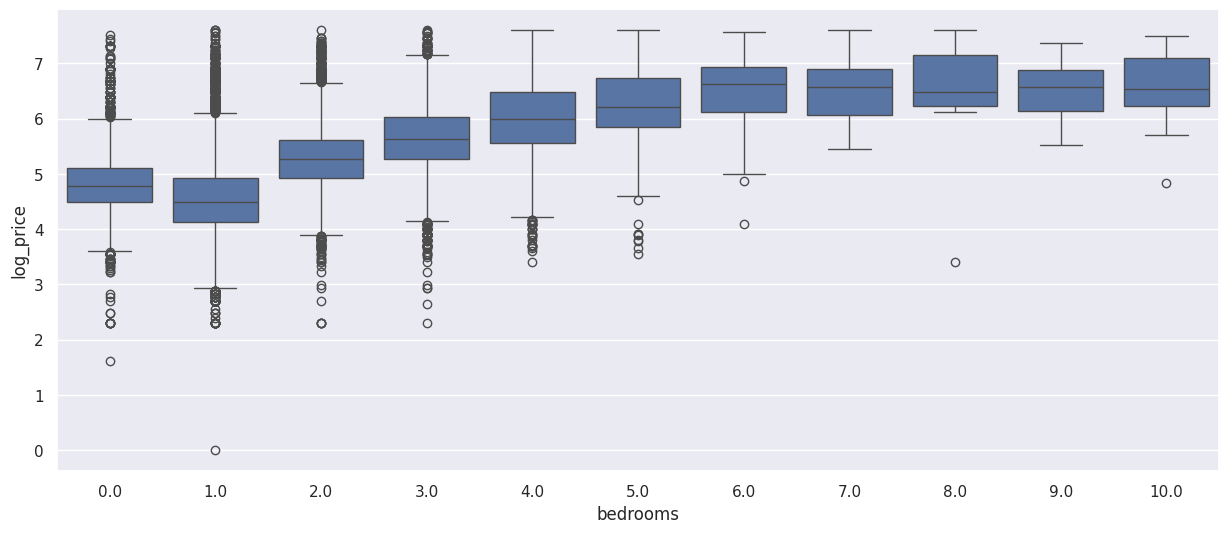

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x="bedrooms", y="log_price")
plt.show()


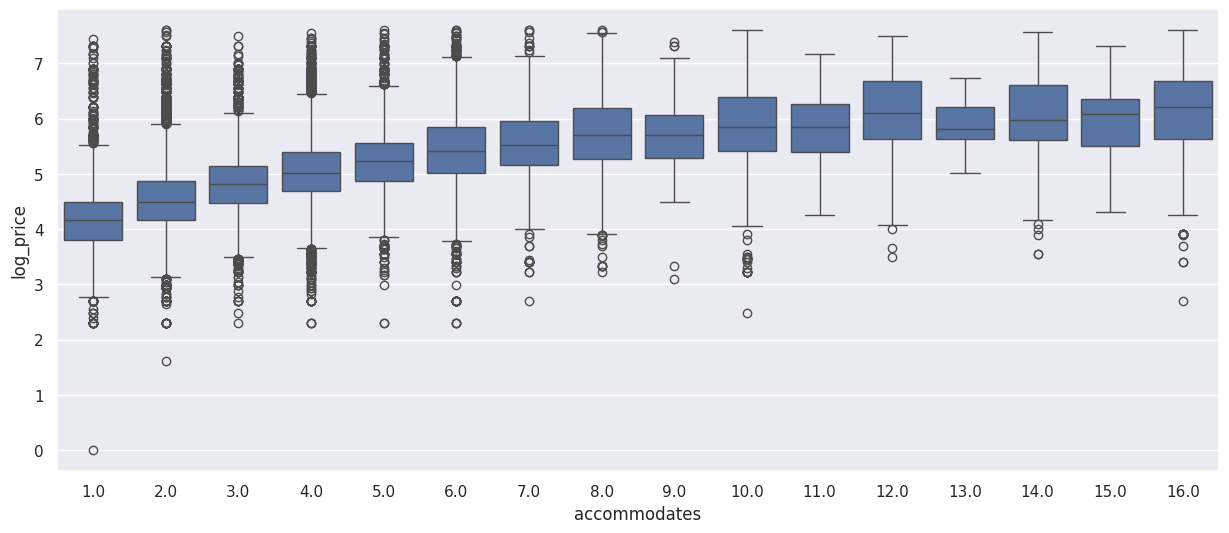

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))
sns.boxplot(data=data, x='accommodates', y='log_price')
plt.show()


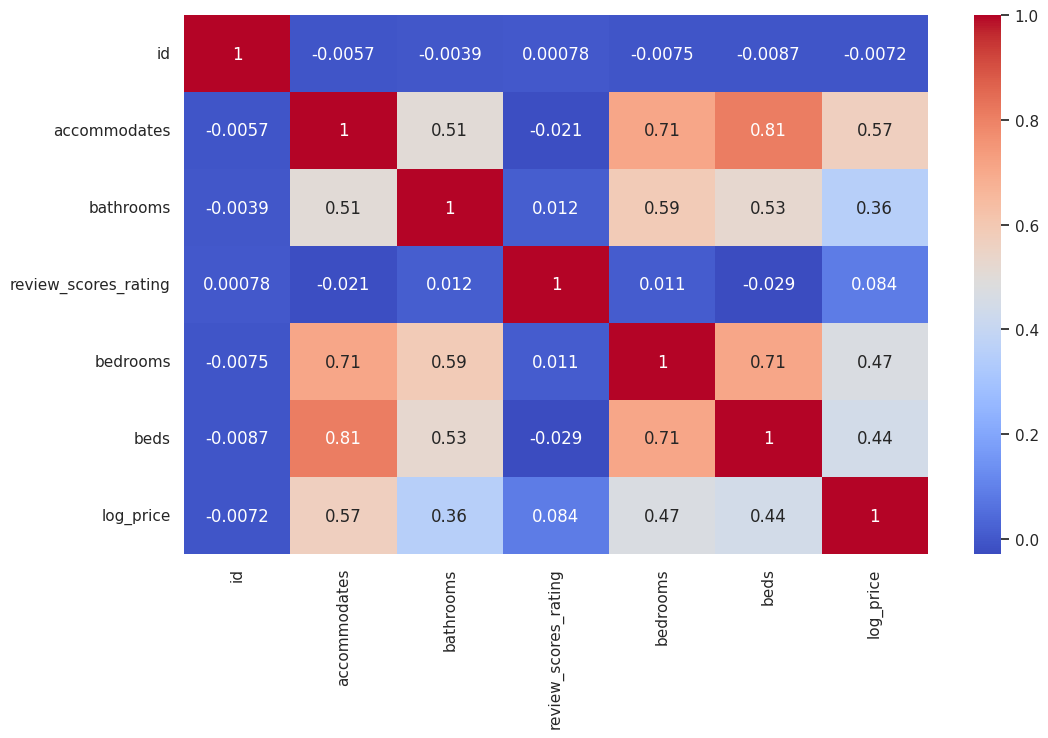

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation heatmap
plt.figure(figsize=(12, 7))
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [42]:
# Check for missing values
data.isnull().sum()

,0
room_type,0
accommodates,0
bathrooms,200
cancellation_policy,0
cleaning_fee,0
instant_bookable,0
review_scores_rating,0
bedrooms,92
beds,131
log_price,0


In [47]:
import pandas as pd
from sklearn.impute import SimpleImputer

bathroom_imputer = SimpleImputer(strategy='median')
data['bathrooms'] = bathroom_imputer.fit_transform(data[['bathrooms']])

# Imputing Bedrooms with Median
bedroom_imputer = SimpleImputer(strategy='median')
data['bedrooms'] = bedroom_imputer.fit_transform(data[['bedrooms']])

# Imputing Beds with Median
beds_imputer = SimpleImputer(strategy='median')
data['beds'] = beds_imputer.fit_transform(data[['beds']])

In [49]:
# Get the list of columns with missing values
columns_with_missing = data.columns[data.isnull().any()].tolist()

print(columns_with_missing)


[]


In [80]:
# list of columns for which missing values will be dropped
nonnumeric_columns = data.select_dtypes(exclude=np.number).columns
data.dropna(subset=nonnumeric_columns, inplace=True)



In [51]:
# Check for missing values
data.isnull().sum()

,0
room_type,0
accommodates,0
bathrooms,0
cancellation_policy,0
cleaning_fee,0
instant_bookable,0
review_scores_rating,0
bedrooms,0
beds,0
log_price,0


In [52]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
room_type,74098,3,Entire home/apt,41302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
accommodates,74098.0,NaN,NaN,NaN,3.155227,2.153685,1.0,2.0,2.0,4.0,16.0
bathrooms,74098.0,NaN,NaN,NaN,1.234649,0.581411,0.0,1.0,1.0,1.0,8.0
cancellation_policy,74098,3,strict,32498,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cleaning_fee,74098,2,True,54393,NaN,NaN,NaN,NaN,NaN,NaN,NaN
instant_bookable,74098,2,f,54650,NaN,NaN,NaN,NaN,NaN,NaN,NaN
review_scores_rating,74098.0,NaN,NaN,NaN,94.503252,6.943478,20.0,93.0,96.0,99.0,100.0
bedrooms,74098.0,NaN,NaN,NaN,1.265527,0.85171,0.0,1.0,1.0,1.0,10.0
beds,74098.0,NaN,NaN,NaN,1.709655,1.253455,0.0,1.0,1.0,2.0,18.0
log_price,74098.0,NaN,NaN,NaN,4.782059,0.717414,0.0,4.317488,4.70953,5.220356,7.600402


In [55]:
eps = 1e-06
data["log_price"] = data["log_price"] + eps

data["log_price"].describe()

,log_price
count,74098.000000
mean,4.782061
std,0.717414
min,0.000002
25%,4.317490
50%,4.709532
75%,5.220358
max,7.600404


In [57]:
bool_cols = ["cleaning_fee", "instant_bookable"]
# Replace 'f' and 't' with 0 and 1 before converting to integers
data[bool_cols] = data[bool_cols].replace({'f': 0, 't': 1}).astype(int)
data.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,1,0,100.0,1.0,1.0,5.010637
1,Entire home/apt,7.0,1.0,strict,1,1,93.0,3.0,3.0,5.129901
2,Entire home/apt,5.0,1.0,moderate,1,1,92.0,1.0,3.0,4.976736
3,Entire home/apt,4.0,1.0,flexible,1,0,96.0,2.0,2.0,6.620075
4,Entire home/apt,2.0,1.0,moderate,1,1,40.0,0.0,1.0,4.744934


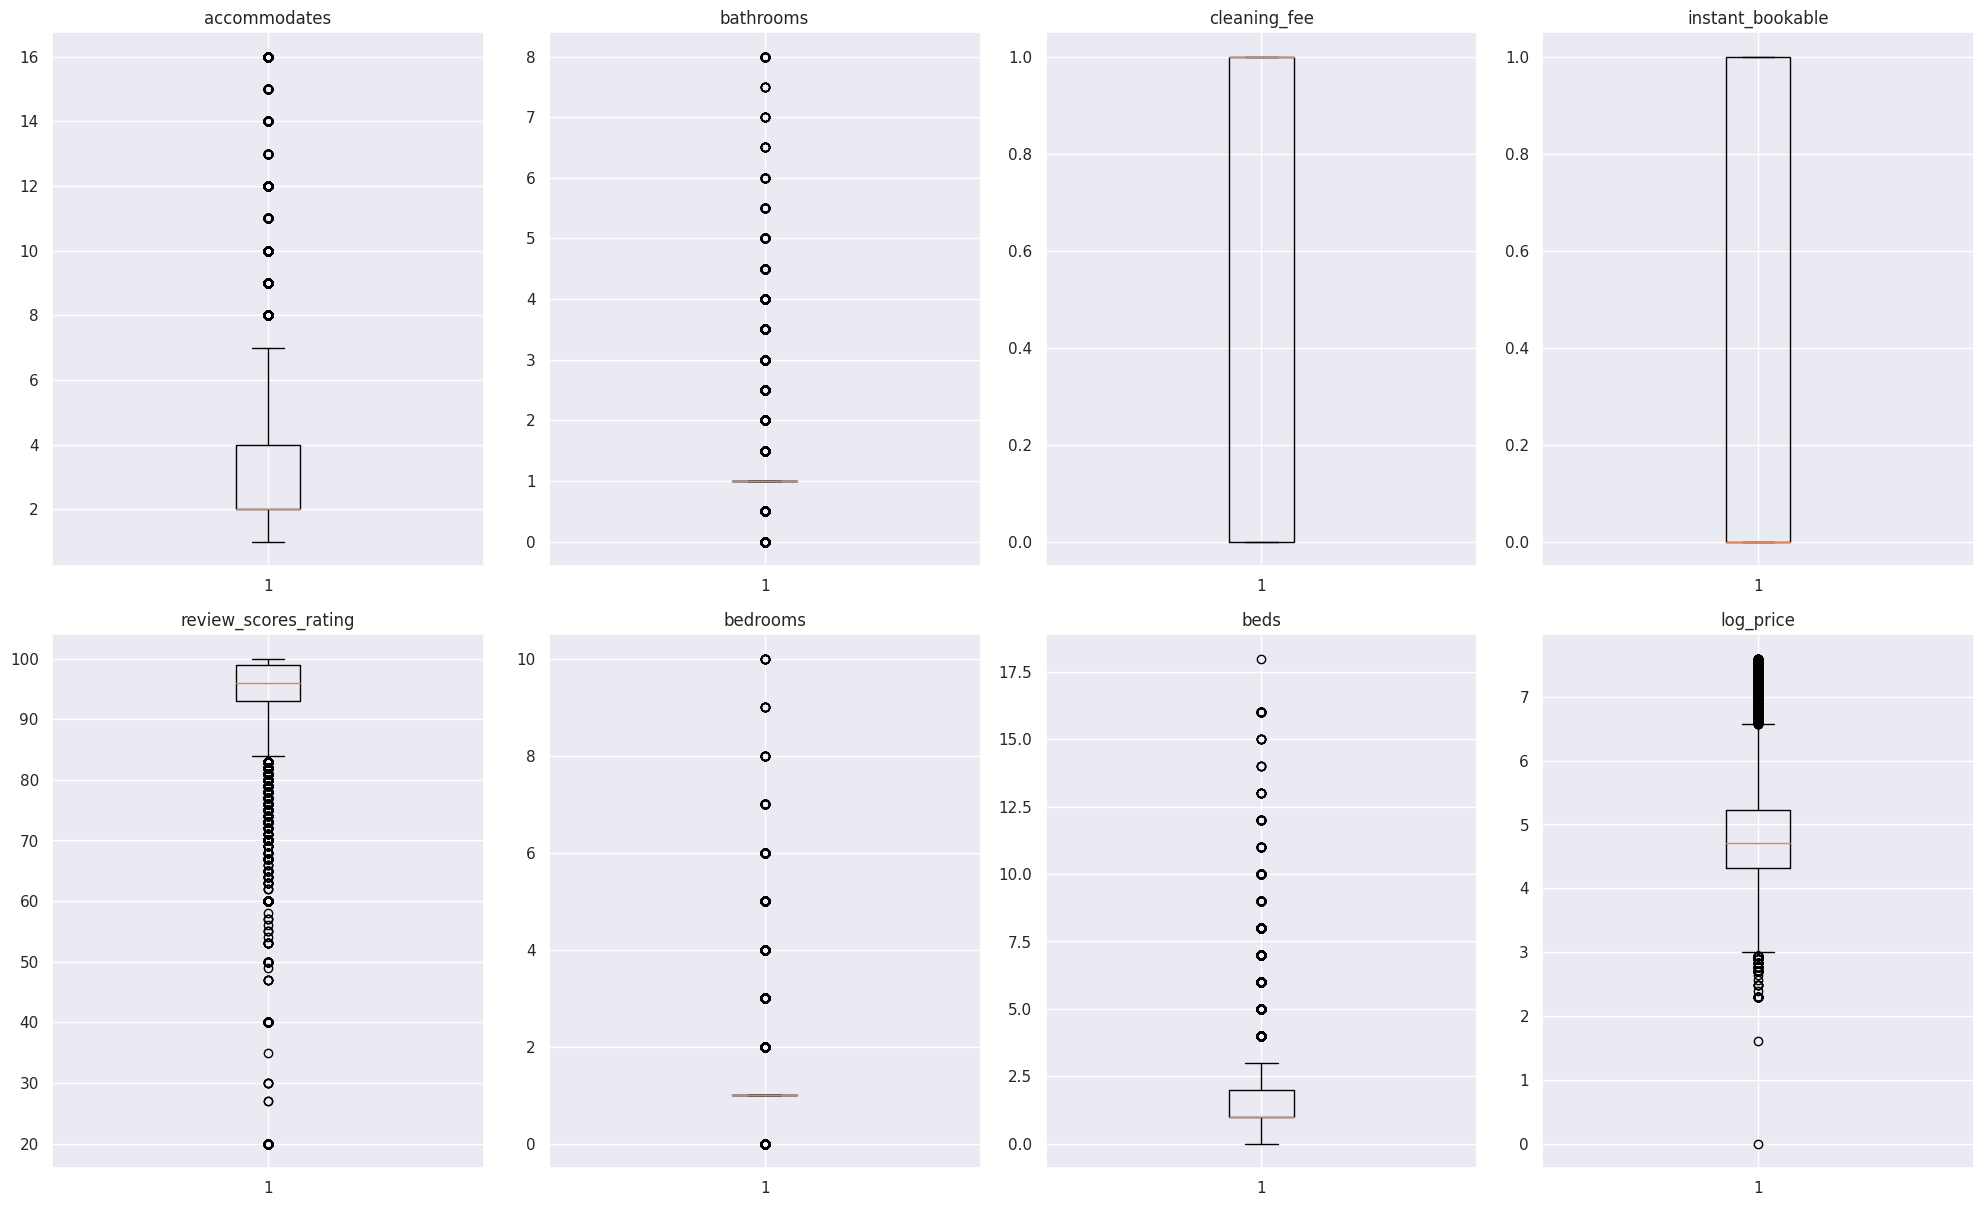

In [59]:
numeric_columns = data.select_dtypes(include=np.number)
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [64]:
def treat_outliers(df, col):
    """
    treats outliers in a varaible
    col: str, name of the numerical varaible
    df: data frame
    col: name of the column
    """
    Q1 = data[col].quantile(0.25)  # 25th quantile
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR
    data[col] = np.clip(
        data[col], Lower_Whisker, Upper_Whisker
    )
    return data


def treat_outliers_all(data, col_list):
    """
    treat outlier in all numerical varaibles
    col_list: list of numerical varaibles
    df: data frame
    """
    for c in col_list:
        data = treat_outliers(data, c)

    return data

In [65]:
# treating the outliers
numerical_col = data.select_dtypes(include=np.number).columns.tolist()
data = treat_outliers_all(data, numerical_col)

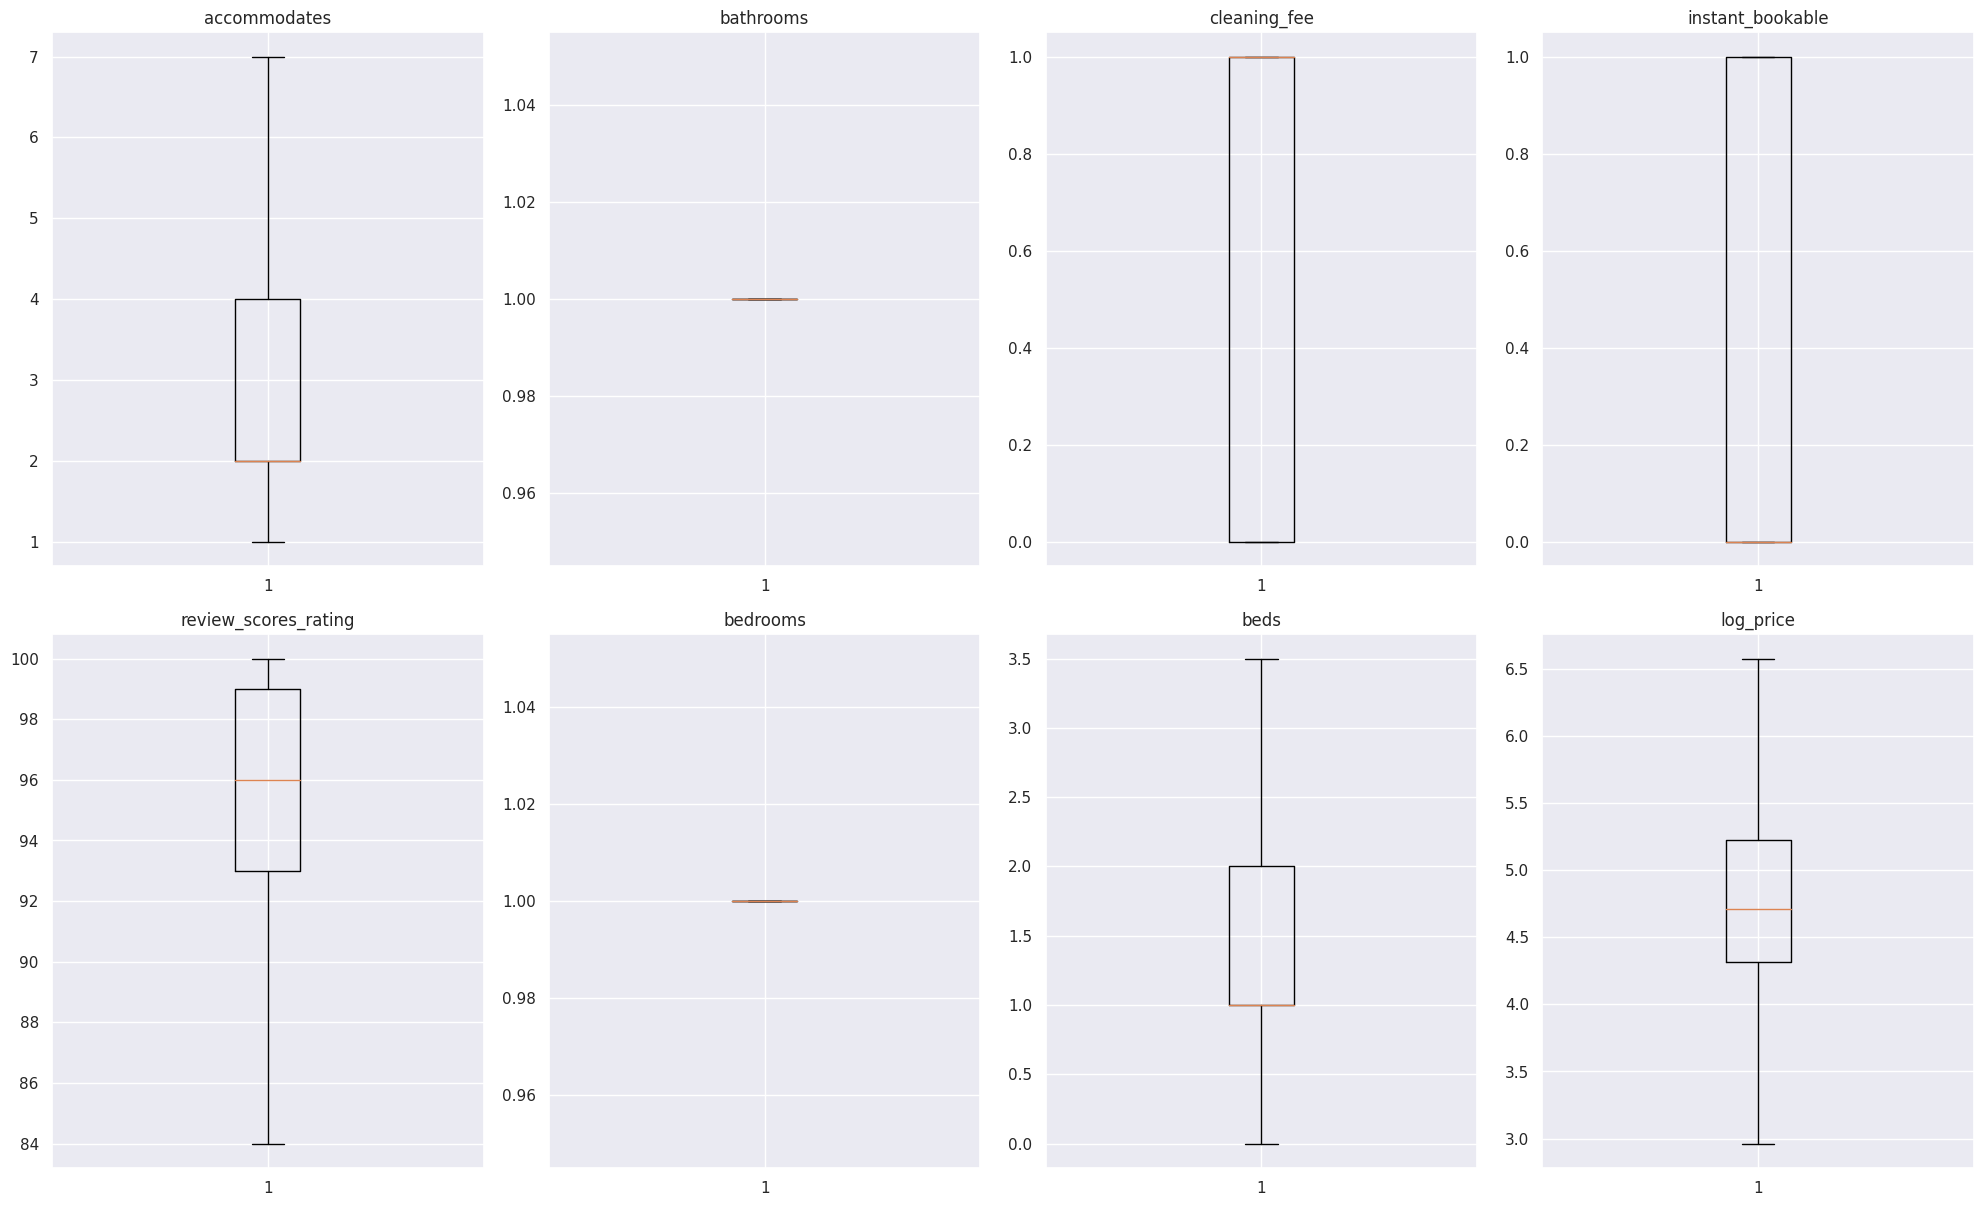

In [67]:
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

## Model Building - Linear Regression

## Model Performance Check

In [69]:

def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [81]:
y = data["log_price"]

In [82]:
X = data.drop(["log_price"], axis=1)
y = data["log_price"]

In [83]:
import pandas as pd
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,accommodates,bathrooms,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict
0,3.0,1.0,1,0,100.0,1.0,1.0,False,False,False,True
1,7.0,1.0,1,1,93.0,1.0,3.0,False,False,False,True
2,5.0,1.0,1,1,92.0,1.0,3.0,False,False,True,False
3,4.0,1.0,1,0,96.0,1.0,2.0,False,False,False,False
4,2.0,1.0,1,1,84.0,1.0,1.0,False,False,True,False


In [84]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [85]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 51868
Number of rows in test data = 22230


In [86]:
# fitting the linear model
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train, y_train)

LinearRegression()

In [87]:
# Check model performance on train data
lin_reg_model_perf_train = model_performance_regression(lin_reg_model, x_train, y_train)
lin_reg_model_perf_train

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.492391,0.38124,0.498691,0.498585,8.070041


In [88]:
# checking model performance on test set
lin_reg_model_perf_test = model_performance_regression(lin_reg_model, x_test, y_test) ## Complete the code to check the performance on test data
lin_reg_model_perf_test

,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.494293,0.382511,0.497982,0.497733,8.10135


## Actionable Insights and Recommendations

In [79]:
# Actionable Insights and Recommendations

 1. Pricing Strategy: The linear regression model can be used to suggest optimal pricing to hosts. By inputting property features, hosts can get an estimated price that is competitive and likely to attract bookings. This can help maximize their rental income.

 2. Demand Prediction: By analyzing the factors that significantly influence price, Airbnb can predict areas or property types that are likely to experience high demand. This information can be used to guide marketing efforts and partnerships.

 3. Cancellation Policy Impact: The analysis revealed the market share of different cancellation policies. This information can help Airbnb understand customer preferences and potentially adjust its policies to increase bookings.

 4. Guest Experience Enhancement: Factors like the number of bedrooms, bathrooms, and amenities strongly correlate with price. Airbnb can encourage hosts to improve these aspects to justify higher prices and enhance the guest experience.

 5. Personalized Recommendations: The model can be used to provide personalized recommendations to travelers based on their preferences and budget. This can improve customer satisfaction and lead to increased bookings.

 6. Dynamic Pricing:Airbnb could consider implementing dynamic pricing, adjusting rental prices based on real-time demand, seasonality, and special events. This can optimize revenue and ensure competitive pricing.

 7. Host Education: Airbnb can provide educational resources to hosts on how to optimize their listings based on the insights from the model. This could include tips on pricing, property improvements, and guest communication.

 8. Market Expansion: By analyzing the model's predictions, Airbnb can identify potential areas for market expansion where demand for short-term rentals is high but supply is limited.

 9. Data-Driven Decision Making: The model provides a data-driven approach to pricing and listing optimization. This can help Airbnb make informed decisions and stay competitive in the ever-evolving hospitality industry.


-


___